In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')


from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ibrahim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('wiki_data.csv',index_col=0)
df.head(5)

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [3]:
def clean_text(df ,df_columns):
    df[df_columns] = df[df_columns].str.lower()
    df[df_columns] = df[df_columns].str.replace('[^\w\s]', '')
    df[df_columns] = df[df_columns].str.replace('\d', '')
    df[df_columns] = df[df_columns].str.replace('\n', '')
    return df
clean_text(df,'text')

,text
1,anovoanovo (formerly a novo) is a computer ser...
2,battery indicatora battery indicator (also kno...
3,"bob peaserobert allen pease (august 22, 1940â ..."
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...
...,...
10855,soundcastsoundcast llc is a privately funded c...
10856,spectrum analyzera spectrum analyzer measures ...
10857,telepresence technologytelepresence technology...
10858,trans-pacific profiler networkthe trans-pacifi...


In [4]:
def remove_stopwords(df,df_columns,count):
    sw = stopwords.words('english')
    df[df_columns] = df[df_columns].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    temp_df = pd.Series(' '.join(df_columns).split()).value_counts()
    drop_words = temp_df[-count:]
    df[df_columns] = df[df_columns].apply(lambda x: " ".join(x for x in x.split() if x not in drop_words))
    return df

In [5]:
remove_stopwords(df,'text',1000)

,text
1,anovoanovo (formerly novo) computer services c...
2,battery indicatora battery indicator (also kno...
3,"bob peaserobert allen pease (august 22, 1940â ..."
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...
...,...
10855,soundcastsoundcast llc privately funded compan...
10856,spectrum analyzera spectrum analyzer measures ...
10857,telepresence technologytelepresence technology...
10858,trans-pacific profiler networkthe trans-pacifi...


In [6]:
import nltk
nltk.download('punkt')

df['text'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /Users/ibrahim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1        [anovoanovo, formerly, novo, computer, service...
2        [battery, indicatora, battery, indicator, also...
3        [bob, peaserobert, allen, pease, august, 22, 1...
4        [cavnetcavnet, secure, military, forum, became...
5        [clidarthe, clidar, scientific, instrument, us...
                               ...                        
10855    [soundcastsoundcast, llc, privately, funded, c...
10856    [spectrum, analyzera, spectrum, analyzer, meas...
10857    [telepresence, technologytelepresence, technol...
10858    [trans-pacific, profiler, networkthe, trans-pa...
10859    [transfer, casea, transfer, case, part, drivet...
Name: text, Length: 10859, dtype: object

In [7]:
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /Users/ibrahim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df

,text
1,anovoanovo (formerly novo) computer service co...
2,battery indicatora battery indicator (also kno...
3,"bob peaserobert allen pea (august 22, 1940â â€..."
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...
...,...
10855,soundcastsoundcast llc privately funded compan...
10856,spectrum analyzera spectrum analyzer measure m...
10857,telepresence technologytelepresence technology...
10858,trans-pacific profiler networkthe trans-pacifi...


In [9]:
from collections import Counter
counter = Counter()
df["text"].apply(lambda x: counter.update(x.split()))

tf = pd.DataFrame(counter.items(), columns=["words", "tf"])


In [10]:
tf = tf.sort_values("tf", ascending=False)

In [11]:
tf

,words,tf
119,used,27318
74,also,21557
149,system,18380
188,use,15054
774,one,14792
...,...,...
215484,rallying.international-level,1
215481,africa.during,1
215480,sunrisers,1
215479,trophyâ€”a,1


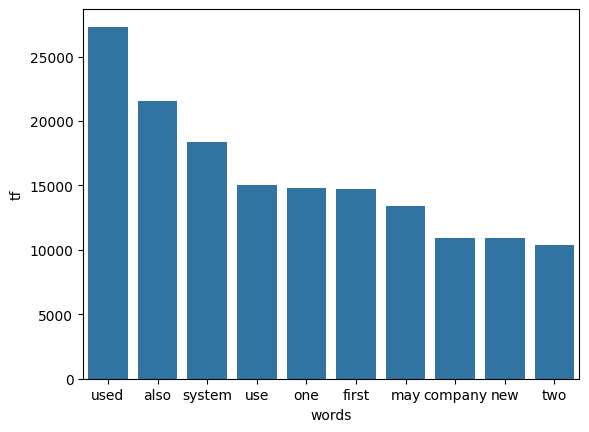

In [12]:
import seaborn as sns
sns.barplot(data=tf[tf["tf"] > 10000],x="words",y="tf")
plt.show()

In [14]:
text = " ".join(i for i in df.text)

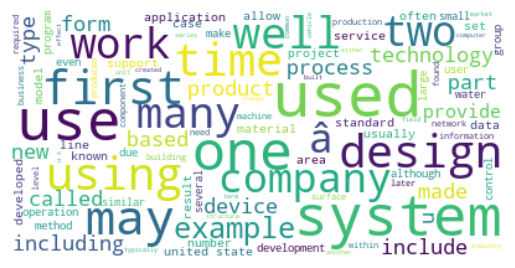

In [18]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")